Wiktoria Lewicka 184915

# Aproksymacja profilu wysokościowego

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import convolve
import csv
from scipy.linalg import solve
import math 

## Metoda Lagrange'a
Dla 3 tras zostanie przetestowane działanie metody interpolacji Lagrange'a.

### Implementacja niezbędnych funkcji

Funkcja mnożąca wielomiany:

In [44]:
def multiply_polynomials(polynomials):
    result = [1]
    
    for polynomial in polynomials:         
        result = np.convolve(result, polynomial)

    return np.array(result)

Funkcja zwracająca wielomian powstały poprzez interpolację Lagrange'a:

In [45]:
def get_lagrange_polynomial(x, y):
    if len(x) != len(y):
        raise Exception('Wrong data length')
        
    # Generate all possible monomials
    monomials = [np.array([1, -v]) for v in x]
    
    # Construct polynomials to the result
    lagrange_polynomials = []
    for i in range(len(x)):
        polynomial = multiply_polynomials(monomials[:i] + monomials[i + 1:])
        lagrange_polynomials.append(polynomial * y[i])
        
    # Construct divider
    dividers = np.ones(len(y))
    for i in range(len(y)):
        for j in range(len(y)):
            if i != j:
                dividers[i] *= x[i] - x[j]
    
    dividers = np.reshape(dividers, (-1,1))
        
    return np.sum(np.divide(lagrange_polynomials, dividers), axis=0)

Funkcja obliczająca wartość wielomianu:
- coefficients- współczynniki wielomianu od najwyższej do najniższej potęgi
- x - x, dla którego obliczana jest wartość funkcji

In [46]:
def get_polynomial_value(coefficients, x):
    n = len(coefficients)
    y = 0
    for i in range(n):
        y = y + coefficients[n - i - 1] * (x ** i)
    return y

### Mount Everest
Interpolacja trasy dla wycieczki po Mount Everest.

In [70]:
path = 'profile_wysokosciowe/2018_paths/MountEverest.csv'

with open(path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    headers = next(reader)
    data = np.array(list(reader)).astype(float)

data_x = [row[0] for row in data]
data_y = [row[1] for row in data]

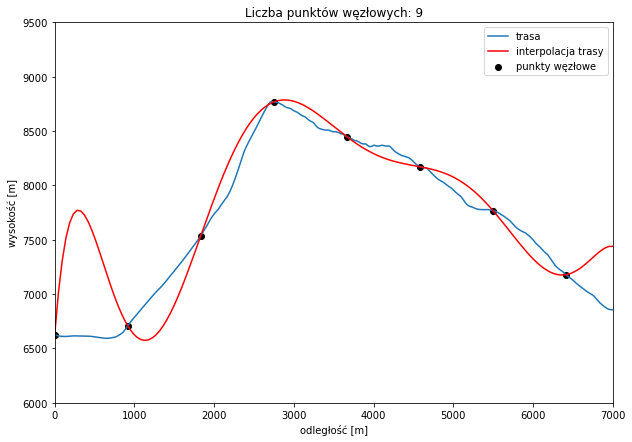

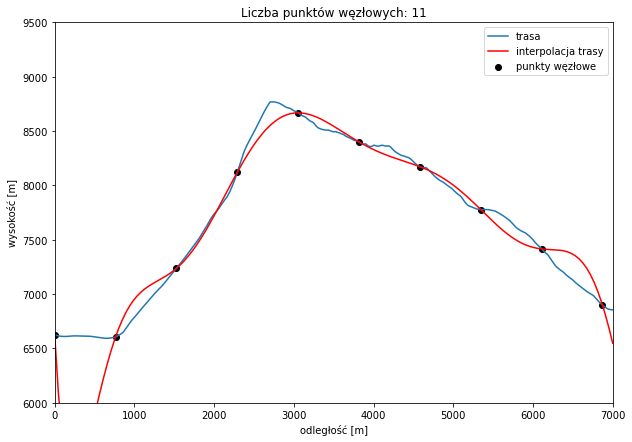

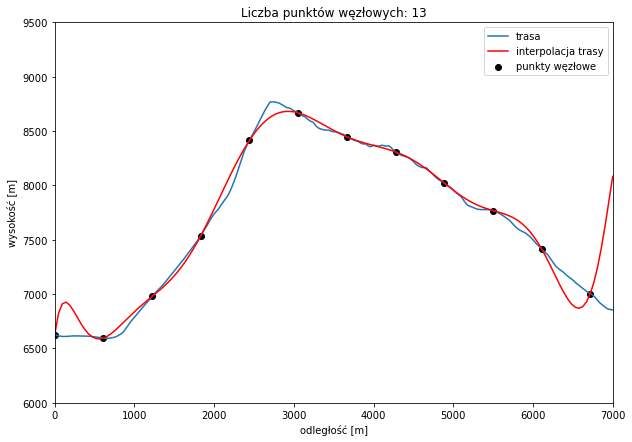

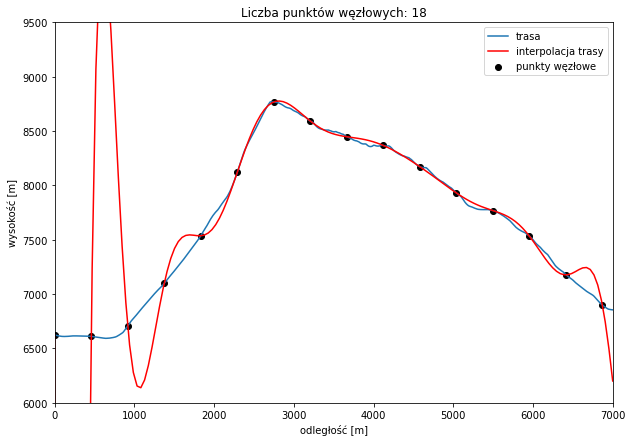

In [73]:
for i in [60, 50, 40, 30]:
    samples_x = [row[0] for row in data[::i]]
    samples_y = [row[1] for row in data[::i]]
    coefficients = get_lagrange_polynomial(samples_x, samples_y)

    x = np.linspace(0, 7000, 150)
    y = get_polynomial_value(coefficients, x)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.plot(data_x, data_y)
    ax.plot(x, y, color='red')
    ax.scatter(samples_x, samples_y, color='black')

    ax.set(xlim=[0, 7000], ylim=[6000, 9500])
    ax.legend(["trasa", "interpolacja trasy", "punkty węzłowe"])
    plt.title("Liczba punktów węzłowych: " + str(len(samples_x)))
    plt.xlabel("odległość [m]")
    plt.ylabel("wysokość [m]")
    
    plt.plot()

### Wielki Kanion Kolorado
Interpolacja trasy dla wycieczki po Wielkim Kanionie Kolorado.

In [74]:
path = 'profile_wysokosciowe/2018_paths/WielkiKanionKolorado.csv'

with open(path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    headers = next(reader)
    data = np.array(list(reader)).astype(float)

data_x = [row[0] for row in data]
data_y = [row[1] for row in data]

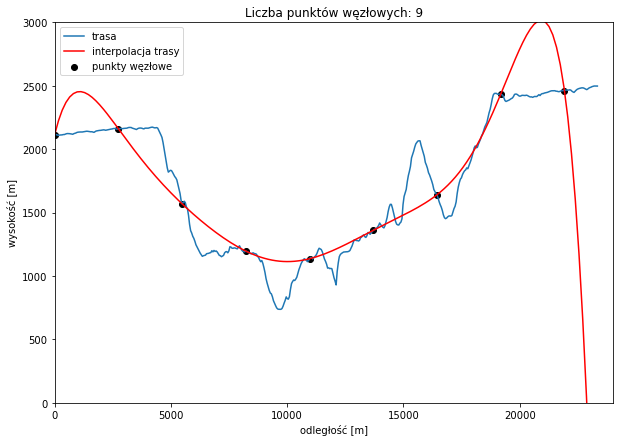

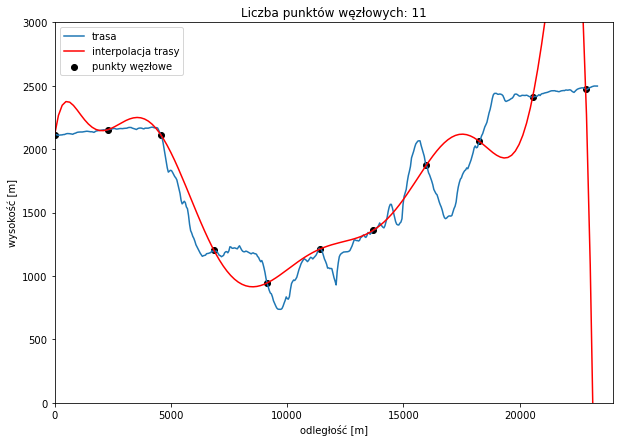

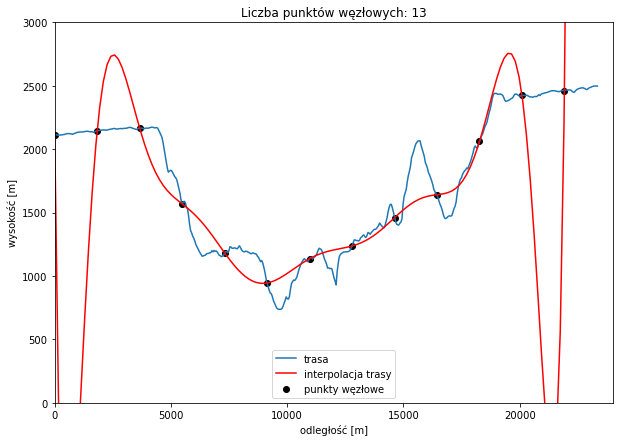

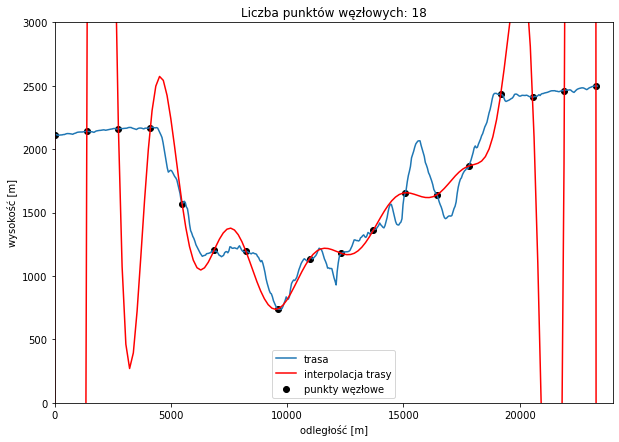

In [75]:
for i in [60, 50, 40, 30]:
    samples_x = [row[0] for row in data[::i]]
    samples_y = [row[1] for row in data[::i]]
    coefficients = get_lagrange_polynomial(samples_x, samples_y)

    x = np.linspace(0, 24000, 150)
    y = get_polynomial_value(coefficients, x)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.plot(data_x, data_y)
    ax.plot(x, y, color='red')
    ax.scatter(samples_x, samples_y, color='black')

    ax.set(xlim=[0, 24000], ylim=[0, 3000])
    ax.legend(["trasa", "interpolacja trasy", "punkty węzłowe"])
    plt.title("Liczba punktów węzłowych: " + str(len(samples_x)))
    plt.xlabel("odległość [m]")
    plt.ylabel("wysokość [m]")
    
    plt.plot()

### Tczew-Starogard
Interpolacja trasy podróży od Tczewa do Starogardu.

In [51]:
path = 'profile_wysokosciowe/2018_paths/tczew_starogard.txt'

with open(path, 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    headers = next(reader)
    data = np.array(list(reader)).astype(float)

data_x = [row[0] for row in data]
data_y = [row[1] for row in data]

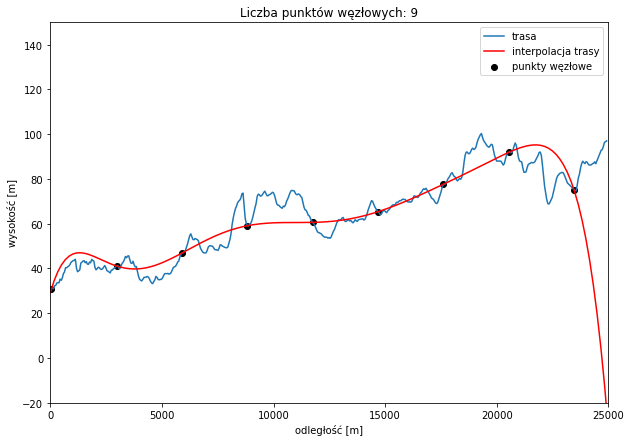

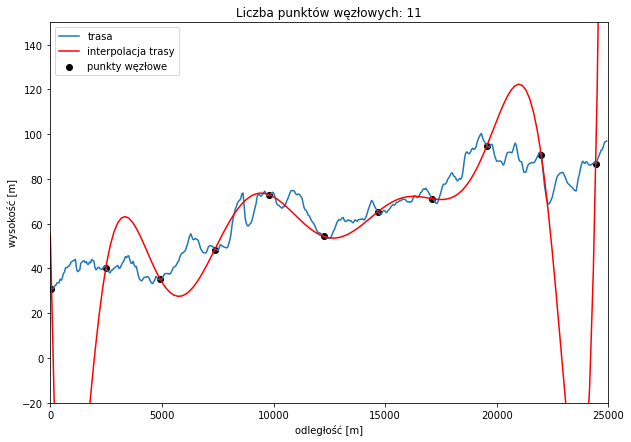

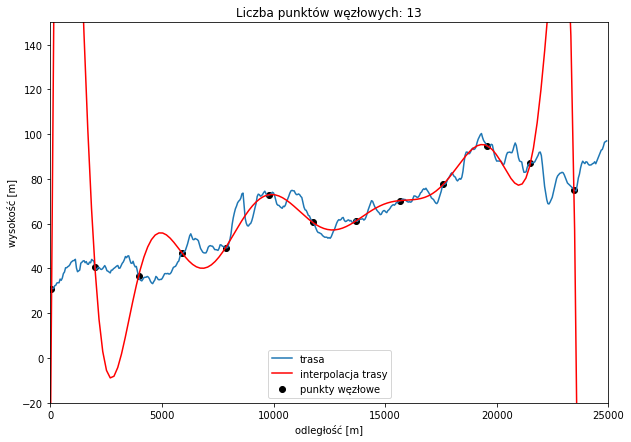

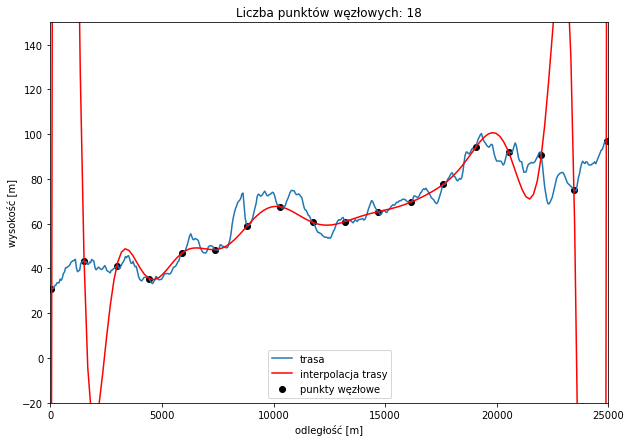

In [82]:
for i in [60, 50, 40, 30]:
    samples_x = [row[0] for row in data[::i]]
    samples_y = [row[1] for row in data[::i]]
    coefficients = get_lagrange_polynomial(samples_x, samples_y)

    x = np.linspace(0, 25000, 150)
    y = get_polynomial_value(coefficients, x)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.plot(data_x, data_y)
    ax.plot(x, y, color='red')
    ax.scatter(samples_x, samples_y, color='black')

    ax.set(xlim=[0, 25000], ylim=[-20, 150])
    ax.legend(["trasa", "interpolacja trasy", "punkty węzłowe"])
    plt.title("Liczba punktów węzłowych: " + str(len(samples_x)))
    plt.xlabel("odległość [m]")
    plt.ylabel("wysokość [m]")
    
    plt.plot()

### Obserwacje i wnioski
Interpolacja Langange'a pozwala przybliżyć trasę z dobrą dokładnością, ale jest podatna na efekt Rungego.
#### Wpływ liczby punktów węzłowych na wyniki
Zbyt duża liczba punktów powoduje efekt Rungego.
#### Wpływ rozmieszczenia punktów węzłowych na wyniki
Gdy punkty są bliżej siebie, interpolacja jest dokładniejsza.
#### Wpływ dokładności pomiaru punktów węzłowych na wyniki
Dla mniej dokładnych pomiarów interpolacja jest lepsza.
#### Wpływ charakteru trasy na wyniki
Dla bardziej zróżnicowanej trasy interpolacja jest mniej dokładna (bardziej podatna na efekt Rungego). Nie da się wyznaczyć bardzo dokładnej interpolacji takiej trasy.

## Metoda funkcji sklejanych trzeciego stopnia
Metoda ta polega na wyznaczeniu przebiegu funkcji przy użyciu połączonych ze sobą wielomianów trzeciego stopnia.

### Implementacja
Funkcja implementująca interpolację metodą funkcji sklejanych trzeciego stopnia:
- argumenty x i y: tablice zawierające współrzędne punktów węzłowych
- wartość zwracana: coefficients - tablica zawierająca współczynniki kolejnych wielomianów

In [94]:
def get_spline_coeffs(x, y):
    functions_count = len(x) - 1
    matrix = [[0 for x in range(functions_count * 4)] for y in range(functions_count * 4)]
    b = []
    empty_row = [0] * 4 * functions_count
    current_row = 0
    
    # values in given nodes 
    for i in range(functions_count):      
        matrix[current_row][i * 4] = 1
        b.append(y[i])
        current_row = current_row + 1
        
        val = x[i + 1] - x[i]
        
        matrix[current_row][i * 4] = 1
        matrix[current_row][i * 4 + 1] = val
        matrix[current_row][i * 4 + 2] = val**2
        matrix[current_row][i * 4 + 3] = val**3  
        
        current_row = current_row + 1
        b.append(y[i + 1])
        
    # intern nodes
    for i in range(1, len(x) - 1):
        # derivatives 1st degree
        val = x[i] - x[i - 1]
        
        matrix[current_row][(i - 1) * 4 + 1] = 1
        matrix[current_row][(i - 1) * 4 + 2] = 2 * val
        matrix[current_row][(i - 1) * 4 + 3] = 3 * val**2
        
        matrix[current_row][i * 4 + 1] = -1
        
        current_row = current_row + 1
        b.append(0)
        
        # derivatives 2nd degree
        matrix[current_row][(i - 1) * 4 + 2] = 2
        matrix[current_row][(i - 1) * 4 + 3] = 6 * val
        
        matrix[current_row][i * 4 + 2] = -2

        current_row = current_row + 1
        b.append(0)
        
    # extern nodes
    matrix[current_row][2] = 1 # for min x
    
    current_row = current_row + 1
    b.append(0)
    
    value = x[len(x) - 1] - x[len(x) - 2]

    matrix[current_row][(functions_count * 4) - 2] = 2
    matrix[current_row][(functions_count * 4) - 1] = 6 * val
    b.append(0)
    
    coefficients = solve(matrix, b)
            
    return coefficients

Funkcje obliczające wartość dla danego x interpolacji:

In [108]:
def get_spline_value(coefficients, x, x0):
    n = len(coefficients)
    y = 0
    for i in range(n):
        y = y + coefficients[n - i - 1] * ((x - x0) ** i)
    return y

In [109]:
def get_interpolated_value(coefficients, x_vals, x):
    coefficients = [coefficients[i:i+4] for i in range(0, len(coefficients), 4)]
    interval = len(coefficients) - 1
    
    # Check interval
    for i in range(len(x_vals)):
        if x <= x_vals[i]:
            interval = i - 1
            break
            
    if interval < 0:
        interval = 0
    
    return get_spline_value(list(reversed(coefficients[interval])), x, x_vals[interval])

In [110]:
c, m = get_spline_coeffs([1,3,5], [6, -2, 4])

ValueError: too many values to unpack (expected 2)

In [111]:
m

[[1, 0, 0, 0, 0, 0, 0, 0],
 [1, 2, 4, 8, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 2, 4, 8],
 [0, 1, 4, 12, 0, -1, 0, 0],
 [0, 0, 2, 12, 0, 0, -2, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 2, 12]]

In [112]:
def get_spline_value(coefficients, x, x0):
    n = len(coefficients)
    y = 0
    for i in range(n):
        y = y + coefficients[n - i - 1] * ((x - x0) ** i)
    return y

In [113]:
def get_interpolated_value(coefficients, x_vals, x):
    coefficients = [coefficients[i:i+4] for i in range(0, len(coefficients), 4)]
    interval = len(coefficients) - 1
    
    # Check interval
    for i in range(len(x_vals)):
        if x <= x_vals[i]:
            interval = i - 1
            break
            
    if interval < 0:
        interval = 0
    
    return get_spline_value(list(reversed(coefficients[interval])), x, x_vals[interval])

### Mount Everest
Interpolacja trasy dla wycieczki po Mount Everest.

In [114]:
path = 'profile_wysokosciowe/2018_paths/MountEverest.csv'

with open(path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    headers = next(reader)
    data = np.array(list(reader)).astype(float)

data_x = [row[0] for row in data]
data_y = [row[1] for row in data]

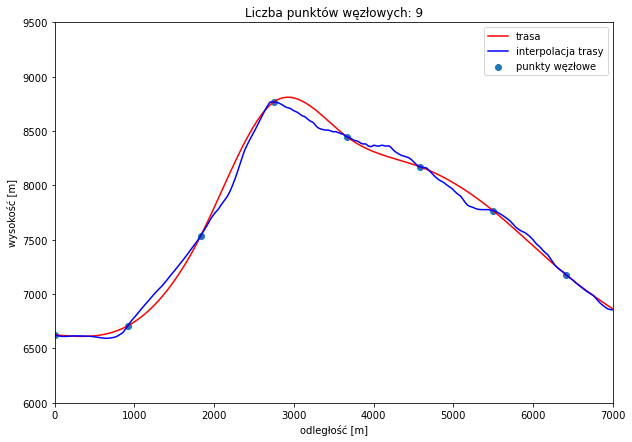

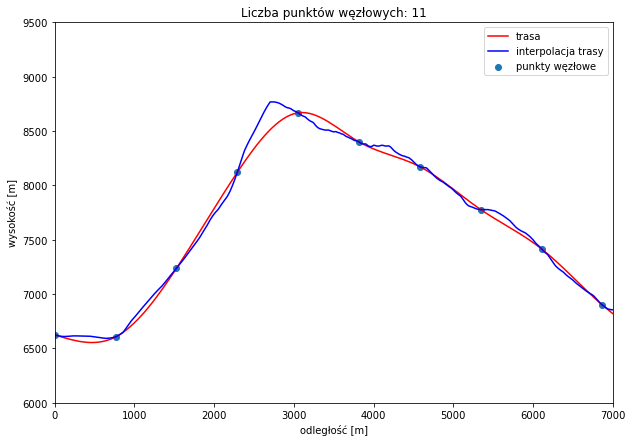

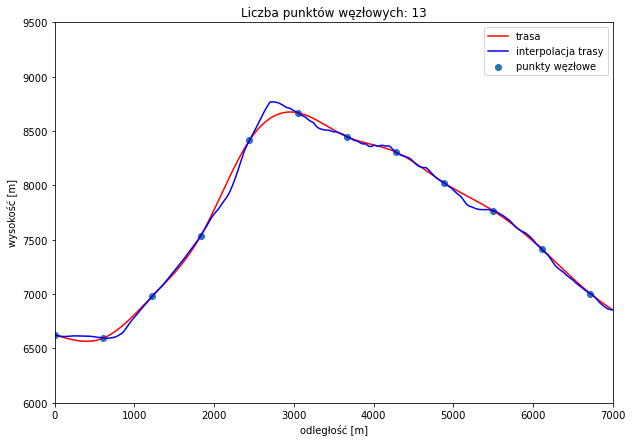

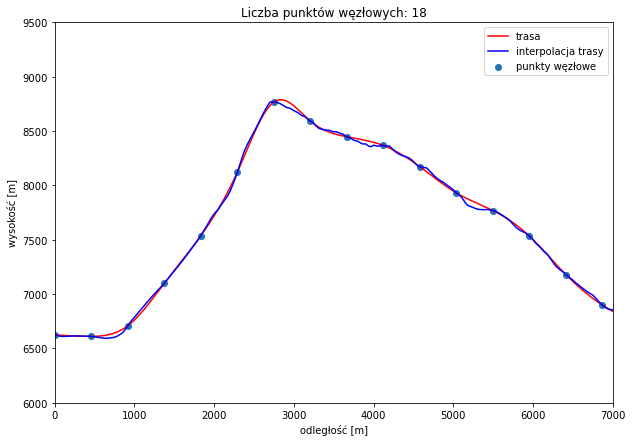

In [115]:
for i in [60, 50, 40, 30]:
    x_vals = [row[0] for row in data[::i]]
    y_vals = [row[1] for row in data[::i]]
    
    coefficients = get_spline_coeffs(x_vals, y_vals)
    
    x = np.linspace(0, 7000, 150)  
    y = list(map(lambda el: get_interpolated_value(coefficients, x_vals, el), x))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.plot(x, y, color='red')
    ax.plot(data_x, data_y, color='blue')
    ax.scatter(x_vals, y_vals)
    ax.set(xlim=[0, 7000], ylim=[6000, 9500])
    
    ax.legend(["trasa", "interpolacja trasy", "punkty węzłowe"])
    plt.title("Liczba punktów węzłowych: " + str(len(x_vals)))
    plt.xlabel("odległość [m]")
    plt.ylabel("wysokość [m]")

    plt.plot()

### Wielki Kanion Kolorado
Interpolacja trasy dla wycieczki po Wielkim Kanionie Kolorado.

In [116]:
path = 'profile_wysokosciowe/2018_paths/WielkiKanionKolorado.csv'

with open(path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    headers = next(reader)
    data = np.array(list(reader)).astype(float)

data_x = [row[0] for row in data]
data_y = [row[1] for row in data]

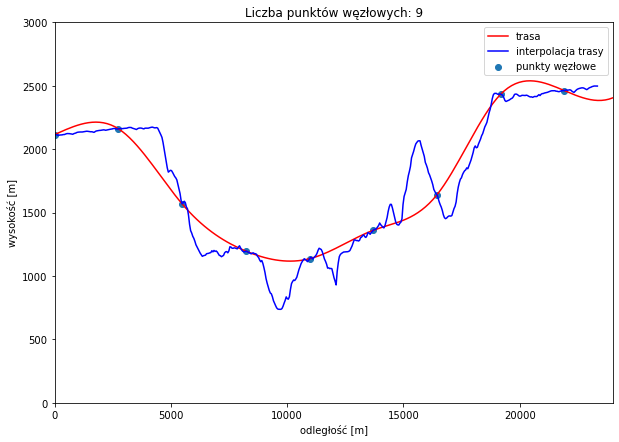

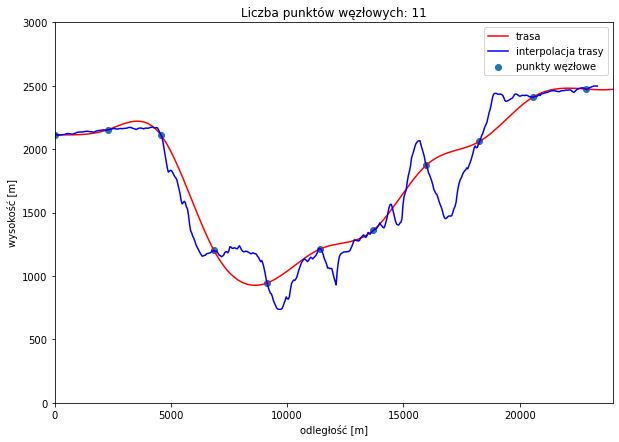

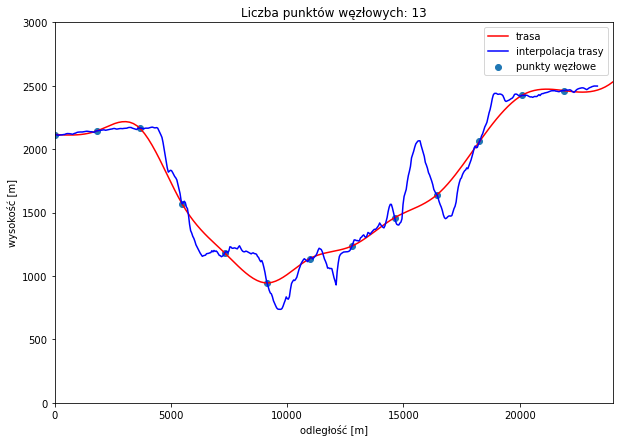

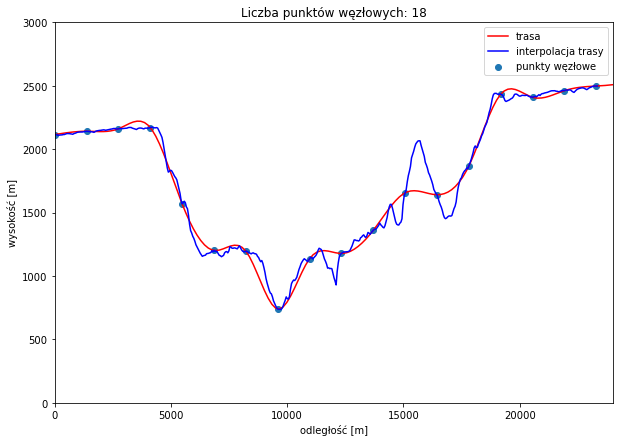

In [117]:
for i in [60, 50, 40, 30]:
    x_vals = [row[0] for row in data[::i]]
    y_vals = [row[1] for row in data[::i]]
    
    coefficients = get_spline_coeffs(x_vals, y_vals)
    
    x = np.linspace(0, 24000, 150)  
    y = list(map(lambda el: get_interpolated_value(coefficients, x_vals, el), x))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.plot(x, y, color='red')
    ax.plot(data_x, data_y, color='blue')
    ax.scatter(x_vals, y_vals)
    ax.set(xlim=[0, 24000], ylim=[0, 3000])
    
    ax.legend(["trasa", "interpolacja trasy", "punkty węzłowe"])
    plt.title("Liczba punktów węzłowych: " + str(len(x_vals)))
    plt.xlabel("odległość [m]")
    plt.ylabel("wysokość [m]")

    plt.plot()

### Tczew-Starogard
Interpolacja trasy podróży od Tczewa do Starogardu.

In [118]:
path = 'profile_wysokosciowe/2018_paths/tczew_starogard.txt'

with open(path, 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    headers = next(reader)
    data = np.array(list(reader)).astype(float)

data_x = [row[0] for row in data]
data_y = [row[1] for row in data]

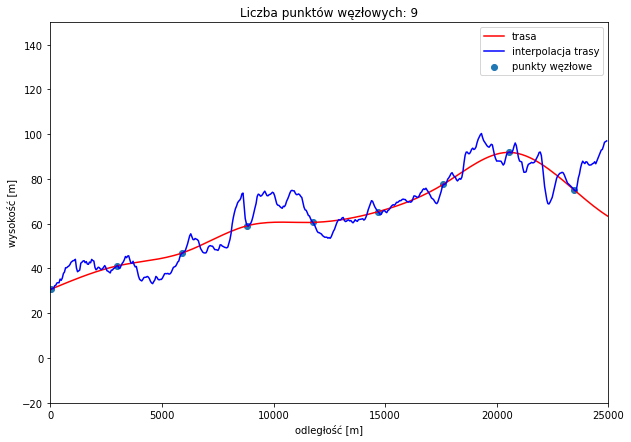

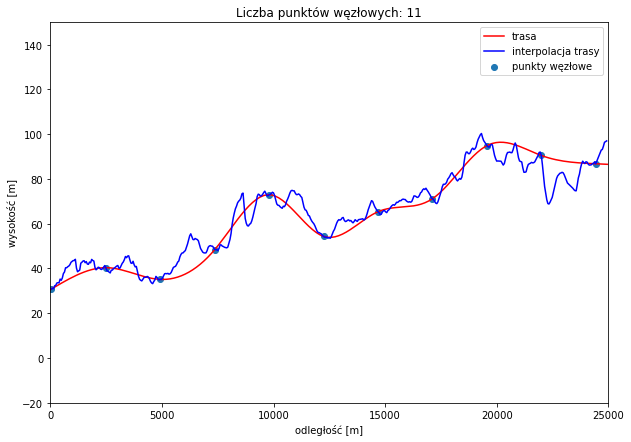

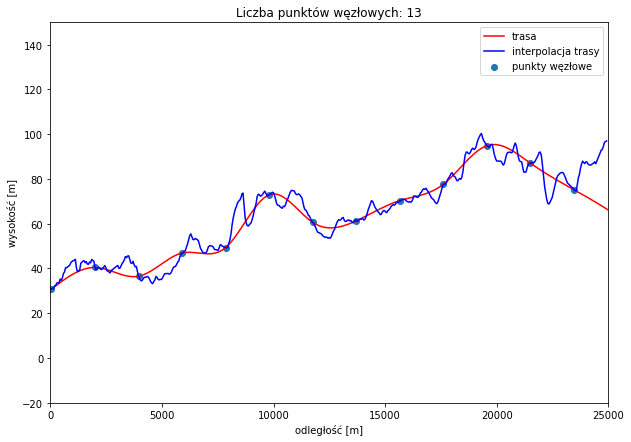

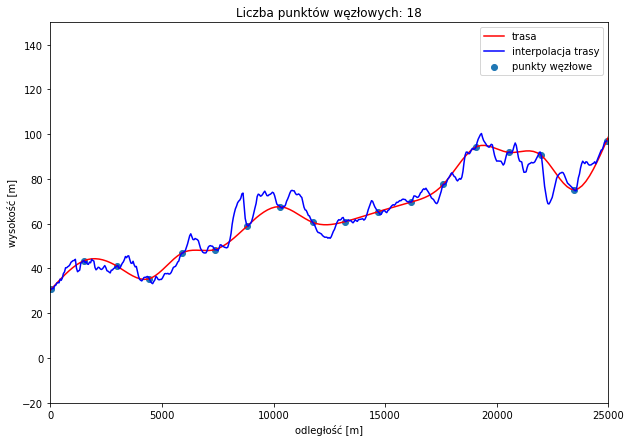

In [119]:
for i in [60, 50, 40, 30]:
    x_vals = [row[0] for row in data[::i]]
    y_vals = [row[1] for row in data[::i]]
    
    coefficients = get_spline_coeffs(x_vals, y_vals)
    
    x = np.linspace(0, 25000, 150)  
    y = list(map(lambda el: get_interpolated_value(coefficients, x_vals, el), x))

    fig, ax = plt.subplots(figsize=(10, 7))
    ax.plot(x, y, color='red')
    ax.plot(data_x, data_y, color='blue')
    ax.scatter(x_vals, y_vals)
    ax.set(xlim=[0, 25000], ylim=[-20, 150])
    
    ax.legend(["trasa", "interpolacja trasy", "punkty węzłowe"])
    plt.title("Liczba punktów węzłowych: " + str(len(x_vals)))
    plt.xlabel("odległość [m]")
    plt.ylabel("wysokość [m]")

    plt.plot()

### Obserwacje i wnioski
Do przeprowadzonych interpolacji zostały użyte takie same punkty jak przy interpolacji Lagrange'a. Metoda interpolacji funkcjami sklejanymi trzeciego stopnia, w przeciwieństwie do metody interpolacji Lagrange'a, jest niepodatna na efekt Rungego.
#### Wpływ liczby punktów węzłowych na wyniki
Im więcej punktów, tym lepsza interpolacja. Brak efektu Rungego.
#### Wpływ rozmieszczenia punktów węzłowych na wyniki
Gdy punkty są bliżej siebie, interpolacja jest dokładniejsza.
#### Wpływ dokładności pomiaru punktów węzłowych na wyniki
Dla dokładniejszych pomiarów potrzeba większej ilości punktów, żeby interpolacja była dokładna.
#### Wpływ charakteru trasy na wyniki
Charakter trasy nie ma znaczącego wpływu na wyniki.

## Ogólne wnioski
Metoda interpolacji przy użyciu funkcji sklejanych jest dokładniejsza i stabilniejsza od metody Lagrange'a. 